In [14]:
import pandas as pd
import numpy as np 

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

In [16]:
# Generate features
size = np.random.normal(1500, 300, 1000)      # mean 1500 sqft, std 300
bedrooms = np.random.randint(1, 5, 1000)      # 1 to 4 bedrooms
age = np.random.randint(0, 30, 1000)          # 0 to 29 years

In [17]:
# Generate price with noise
noise = np.random.normal(0, 25000, 1000)
price = 50 * size + 10000 * bedrooms - 300 * age + noise

In [18]:
# Create DataFrame
housing_data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

In [19]:
print(housing_data.head())

          Size  Bedrooms  Age          Price
0  1649.014246         3   10  129718.303679
1  1458.520710         4    0  126305.372259
2  1694.306561         1   12  111581.094616
3  1956.908957         4   18  102320.359819
4  1429.753988         3   23  109285.942948


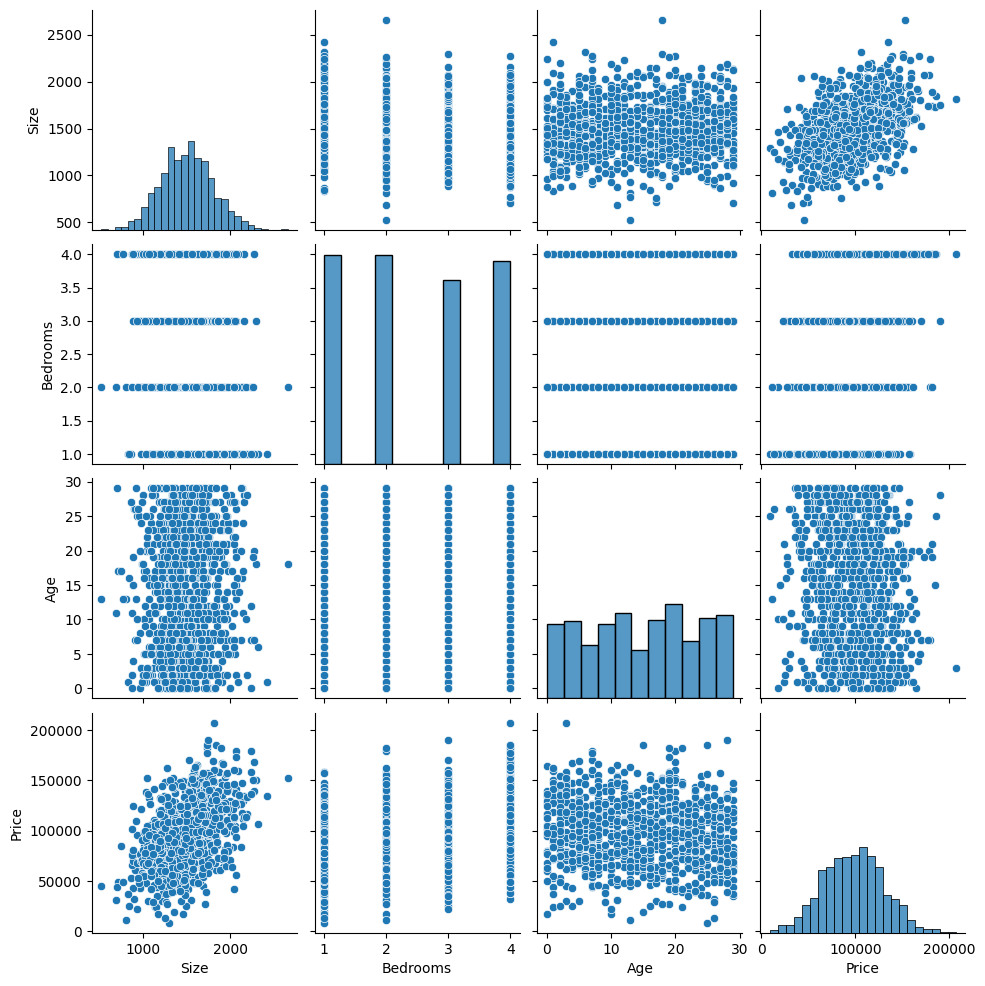

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(housing_data)
plt.show()

In [21]:
#Separate features and target variable, then split into training and testing sets.
from sklearn.model_selection import train_test_split

X = housing_data[['Size', 'Bedrooms', 'Age']]
y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Linear Regression

In [22]:
#Build and Train the Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.4570851616495809
Mean Squared Error: 599416790.2165176


In [24]:
#Interpreting the Model co-efficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


    Feature  Coefficient
0      Size    50.855774
1  Bedrooms  9409.941085
2       Age  -367.530232


In [25]:
#Make Predictions
# Example: 1600 sqft, 3 bedrooms, 10 years old
new_house = np.array([[1600, 3, 10]])
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])


Predicted Price: 108706.99613145579


c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
model.score(X_test, y_test)

0.4570851616495809

### Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [30]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_poly, y_train)
y_pred_rf = model_rf.predict(X_test_poly)

In [33]:
score = r2_score(y_test, y_pred)
print(f"R2 Score: {score:.2f}")

R2 Score: 0.46
